---
# Caso Limpieza de Sueldos de San Francisco

Después del análisis de datos que usted realizó sobre la nómina de sueldos de San Francisco, el alcalde notó los errores de datos que existían y los problemas que acarrean a la gestión. Por este motivo, decidió contratarlo para que haga un análisis de la calidad de datos y realice la limpieza de datos a efecto de contar con información confiable para la toma de decisiones. 


Como entregable, se solicita un notebook ordenado, documentado y reproducible en donde:

1. Realice un análisis de valores nulos en las columnas BasePay, OverTimePay, OtherPay, Benefits, TotalPay y TotalPayBenefits
2. Realice un análisis de outliers en la columna BasePay
3. Realice la limpieza de los datos de acuerdo a los criterios aprendidos (dejar, imputar, eliminar)
4. Genere un nuevo archivo Excel con los datos limpios


---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# Análisis de valores nulos
BasePay, OverTimePay, OtherPay, Benefits, TotalPay y TotalPayBenefits


In [5]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
missing_tokens = ["--", "n/a", "na", "NA", "NaN", ""]
df = df.replace(missing_tokens, np.nan)

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Outliers columna BasePay

In [8]:
#Realice un análisis de outliers en la columna BasePay

q1 = df["BasePay"].quantile(0.25)
q3 = df["BasePay"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df["BasePay"] < lim_inf) | (df["BasePay"] > lim_sup)]

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("Cantidad de outliers (BasePay):", len(outliers))

outliers

Q1: 33588.2
Q3: 94691.05
IQR: 61102.850000000006
Límite inferior: -58066.07500000001
Límite superior: 186345.325
Cantidad de outliers (BasePay): 1037


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN
12,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0.00,0.00,NaN,294580.02,294580.02,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111314,111315,Firoozeh Parsa Nezhad,Senior Physician Specialist,187076.75,0.00,1747.50,53379.00,188824.25,242203.25,2014,NaN,San Francisco,NaN
111317,111318,Jignesh Desai,Engineer,188189.15,0.00,0.00,53922.10,188189.15,242111.25,2014,NaN,San Francisco,NaN
111368,111369,Elaine C Warren,"Head Atty, Civil & Criminal",191709.01,0.00,5084.26,43538.27,196793.27,240331.54,2014,NaN,San Francisco,NaN
111403,111404,Donald E Ellison,"Deputy Dir I, MTA",186851.70,0.00,0.00,51985.84,186851.70,238837.54,2014,NaN,San Francisco,NaN


<Axes: >

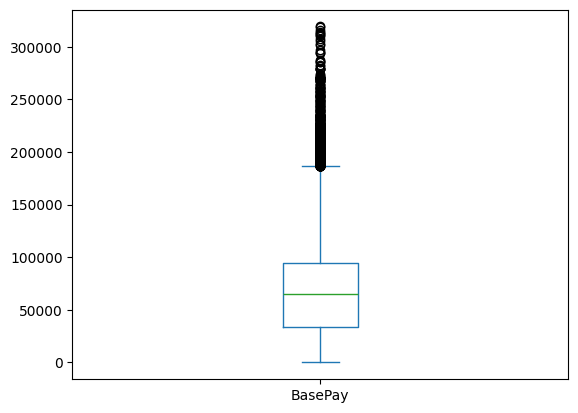

In [9]:
df['BasePay'].plot(kind='box')


# Limpieza de datos

In [11]:
# Imputar

# Numéricas (mediana)
numeric_cols = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits"]

for col in numeric_cols:
    med = df[col].median()
    df[col] = df[col].fillna(med)
    print(f"{col}: mediana usada = {med}")

# Categóricas (moda)
cat_cols = ["EmployeeName", "JobTitle", "Agency", "Status"]
for col in cat_cols:
    moda = df[col].mode(dropna=True)
    if len(moda) > 0:
        moda = moda.iloc[0]
        df[col] = df[col].fillna(moda)
        print(f"{col}: moda usada = {moda}")

# Verificamos faltantes
print("Faltantes por columna (después de imputación):")
print(df.isna().sum())


BasePay: mediana usada = 65007.45
OvertimePay: mediana usada = 0.0
OtherPay: mediana usada = 811.27
Benefits: mediana usada = 28628.62
TotalPay: mediana usada = 71426.60999999999
TotalPayBenefits: mediana usada = 92404.09
EmployeeName: moda usada = Kevin Lee
JobTitle: moda usada = Transit Operator
Agency: moda usada = San Francisco
Faltantes por columna (después de imputación):
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [13]:
df.describe(include="all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,0.0,148654,0.0
unique,NaN,110811,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
freq,NaN,13,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148654,NaN
mean,74327.500000,NaN,NaN,66320.049313,5065.923568,3648.690945,25888.705945,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,42677.029781,11454.256594,8056.506915,13488.172930,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,33847.017500,0.000000,0.000000,22342.297500,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [ ]:
# Eliminar



# Archivo nuevo con datos limpios

In [14]:
#Genere un nuevo archivo Excel con los datos limpios

out_path = "Salaries_clean.csv"
df.to_csv(out_path, index=False)

print("Archivo guardado en:", out_path)

Archivo guardado en: Salaries_clean.csv
